# RooFit Example 109: chi-square residuals and pulls

This example translates the example [RF109](https://root.cern.ch/doc/master/rf109__chi2residpull_8py.html).

chi^2/ndof = 2.77


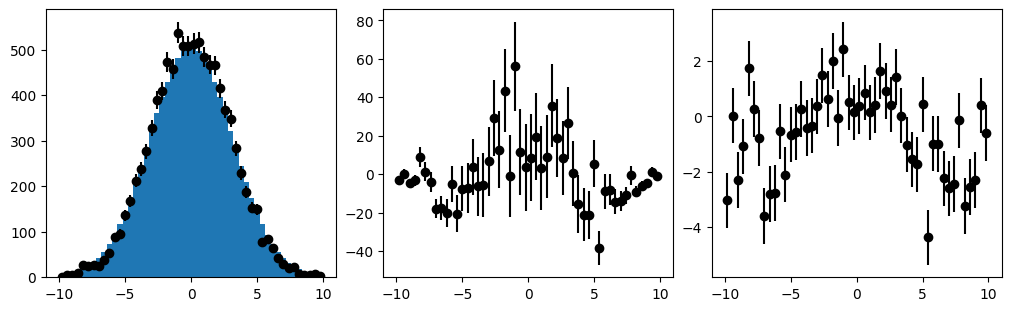

In [6]:
import numpy as np
from numba_stats import norm
from iminuit.cost import BinnedNLL
import boost_histogram as bh
from matplotlib import pyplot as plt

# generate a sample of 1000 events with sigma=3
rng = np.random.default_rng(1)
x = rng.normal(scale=3, size=10000)

# make histogram
h = bh.Histogram(bh.axis.Regular(50, -10, 10))
h.fill(x)
cx = h.axes[0].centers
xe = h.axes[0].edges

# compute residuals and pulls for wrong Gaussian with sigma = 3.15
pars = [
    0,  # mu
    3.15,  # sigma
]

# pulls can be computed from the cost functions in iminuit.cost 
cost = BinnedNLL(h.values(), xe, lambda x, mu, sigma: norm.cdf(x, mu, sigma))
pulls = cost.pulls(pars)
residuals = h.values() - cost.prediction(pars)

# expected count per bin
ym = cost.prediction(pars)

# value returned by cost function is chi-square
chi_square = cost(*pars)
print(f"chi^2/ndof = {chi_square / len(cx):.2f}")

fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharex=True, constrained_layout=True)

# plot data and gaussian model with sigma = 3.15
plt.sca(ax[0])
plt.errorbar(cx, h.values(), h.variances() ** 0.5, fmt="ok")
plt.stairs(ym, xe, fill=True)

# residual distribution
plt.sca(ax[1])
plt.errorbar(cx, residuals, h.variances() ** 0.5, fmt="ok")

# pull distribution
plt.sca(ax[2])
plt.errorbar(cx, pulls, 1, fmt="ok");